<b> This EDA will look at the values from a year worth of residential solar generation and weather data. My hypothesis is that Cloud Cover will be the most significant variable in predicting daily output of energy. </b>

In [2]:
#load packages and explore column field names, total rows and columns, explore data types
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
solar = pd.read_csv(r'C:\Users\valha\Desktop\Solar Data\Weather_and_energy_Final_2020_2021.csv', header=0)
panels = pd.read_csv(r'C:\Users\valha\Desktop\Solar Data\Panel_Monthly_totals_2020_2021.csv', header=0)
print(solar.columns.values)
print(np.shape(solar))
print(solar.dtypes)
print(solar.head())
print(panels.columns.values)
print(np.shape(panels))
print(panels.dtypes)
print(panels.head())

['Name' 'Date time' 'Energy Discharged (Wh)' 'Maximum Temperature'
 'Minimum Temperature' 'Temperature' 'Wind Chill' 'Heat Index'
 'Precipitation' 'Snow' 'Snow Depth' 'Wind Speed' 'Wind Direction'
 'Wind Gust' 'Visibility' 'Cloud Cover' 'Relative Humidity' 'Conditions']
(393, 18)
Name                       object
Date time                  object
Energy Discharged (Wh)      int64
Maximum Temperature       float64
Minimum Temperature       float64
Temperature               float64
Wind Chill                float64
Heat Index                float64
Precipitation             float64
Snow                      float64
Snow Depth                float64
Wind Speed                float64
Wind Direction            float64
Wind Gust                 float64
Visibility                float64
Cloud Cover               float64
Relative Humidity         float64
Conditions                 object
dtype: object
                                                Name Date time  \
0  29 Byrd Rd, Black Mounta

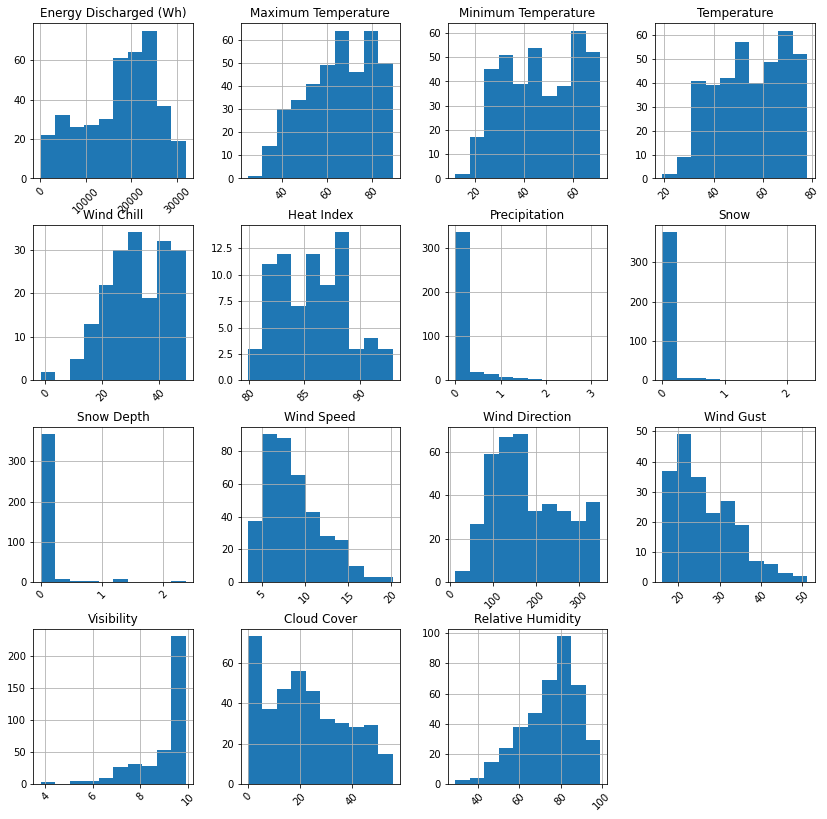

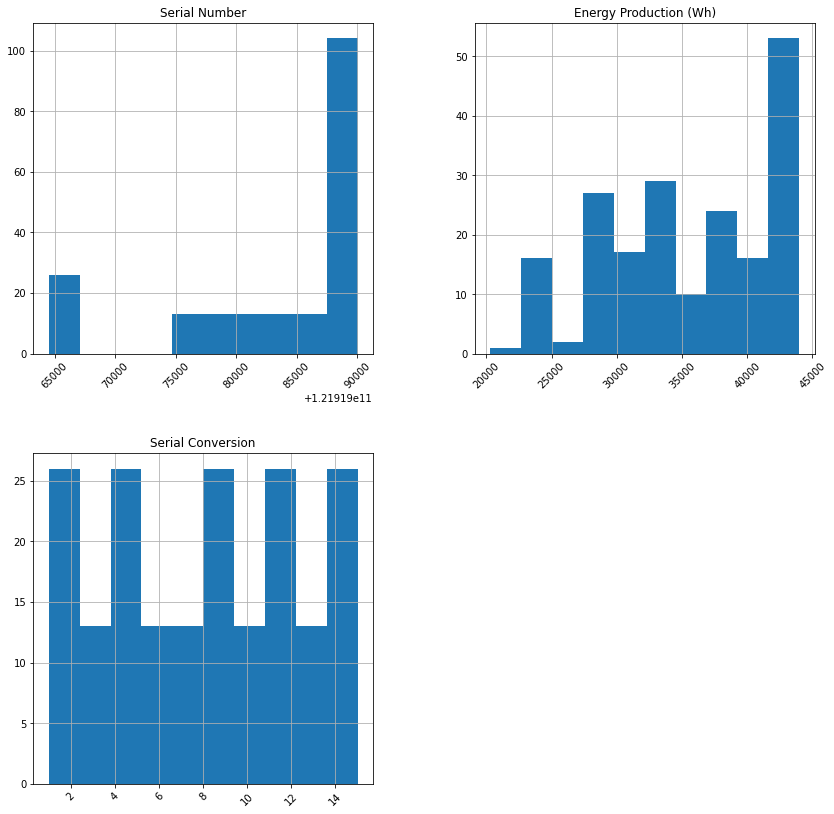

In [2]:
#Exploring the distribution in the data very generally
solar.hist(figsize=(14,14), xrot=45)
plt.show()

panels.hist(figsize=(14,14), xrot=45)
plt.show()

<b> Looking at the distribution in the data, I can see some general trends across power generation and weather. The data shows a trend towards low levels of cloud cover and high levels of visuability which is good for solar power generation. The levels of Energy Discharge are left scewed which is good because higher levels are good. On the individual panel data, the energy generation is also on the higher end of the plot. </b>

In [3]:
#Describe the data with summary statistics
solar.describe()

,Energy Discharged (Wh),Maximum Temperature,Minimum Temperature,Temperature,Wind Chill,Heat Index,Precipitation,Snow,Snow Depth,Wind Speed,Wind Direction,Wind Gust,Visibility,Cloud Cover,Relative Humidity
count,393.000000,393.000000,393.000000,393.000000,187.000000,78.000000,393.000000,393.000000,393.000000,393.000000,393.000000,208.000000,393.000000,393.000000,393.000000
mean,17548.552163,65.034860,46.471501,55.134351,32.131551,85.843590,0.177557,0.032875,0.063893,8.737405,182.546209,26.619231,8.988041,22.194911,74.889491
std,7946.599926,14.894287,14.770230,14.024123,10.379722,3.165257,0.416905,0.176037,0.278237,3.206069,83.860883,7.500532,1.183834,15.500175,13.471314
min,58.000000,24.900000,11.900000,19.200000,-1.700000,79.900000,0.000000,0.000000,0.000000,3.400000,11.000000,16.100000,3.800000,0.000000,29.110000
25%,11112.000000,53.700000,33.300000,44.100000,24.950000,83.325000,0.000000,0.000000,0.000000,6.300000,115.830000,20.800000,8.300000,9.400000,67.030000
50%,19093.000000,66.400000,45.700000,55.300000,31.500000,85.750000,0.000000,0.000000,0.000000,8.100000,162.170000,24.200000,9.500000,20.600000,77.640000
75%,24008.000000,77.900000,60.900000,68.200000,41.200000,88.100000,0.140000,0.000000,0.000000,10.700000,247.290000,32.200000,9.900000,33.900000,84.680000
max,31885.000000,89.400000,70.900000,78.000000,49.300000,93.000000,3.190000,2.330000,2.360000,20.200000,349.290000,51.200000,9.900000,55.600000,99.060000


In [4]:
#Describe the data with summary statistics
panels.describe()

,Serial Number,Energy Production (Wh),Serial Conversion
count,1.950000e+02,195.000000,195.000000
mean,1.219191e+11,35425.712821,8.000000
std,8.655033e+03,6394.139710,4.331615
min,1.219191e+11,20302.000000,1.000000
25%,1.219191e+11,30119.000000,4.000000
50%,1.219191e+11,36501.000000,8.000000
75%,1.219191e+11,41726.000000,12.000000
max,1.219191e+11,43976.000000,15.000000


In [5]:
#Look at correlation between variables
solarcorr = solar.corr()
print(solarcorr)

                        Energy Discharged (Wh)  Maximum Temperature  \
Energy Discharged (Wh)                1.000000             0.362512   
Maximum Temperature                   0.362512             1.000000   
Minimum Temperature                   0.049798             0.869096   
Temperature                           0.206063             0.961257   
Wind Chill                           -0.025300             0.754532   
Heat Index                           -0.227144             0.873693   
Precipitation                        -0.419500             0.010539   
Snow                                 -0.117772            -0.308283   
Snow Depth                           -0.121600            -0.346642   
Wind Speed                            0.187869            -0.267912   
Wind Direction                        0.146154            -0.347672   
Wind Gust                            -0.020414            -0.383079   
Visibility                            0.486527             0.068428   
Cloud 

<b> This correlation data is relatively harder to interpret than a visual. I will make a heatmap to make the variables more intuitive to look at </b>

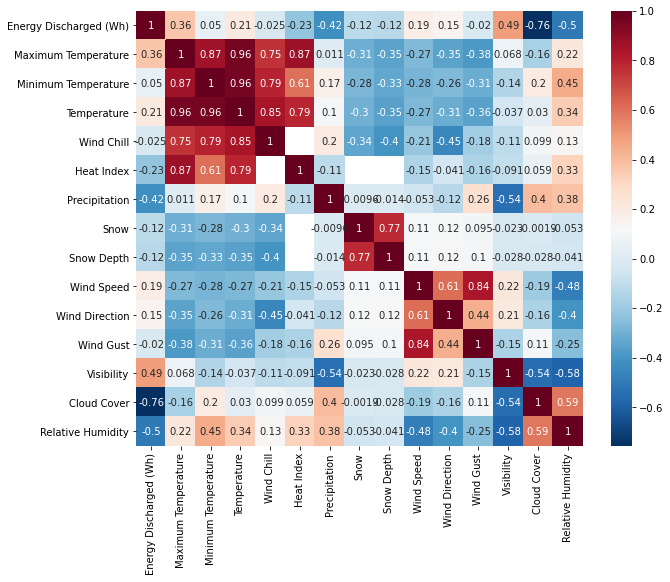

In [7]:
#Heatmap of correlations
plt.figure(figsize=(10,8))
sns.heatmap(solarcorr, cmap='RdBu_r', annot=True)
plt.show()

<b> From the heatmap I can see that Cloud Cover is the value most correlated with Energy Dischaged and will be used in the linear regression model. </b>

<AxesSubplot:xlabel='Cloud Cover', ylabel='Energy Discharged (Wh)'>

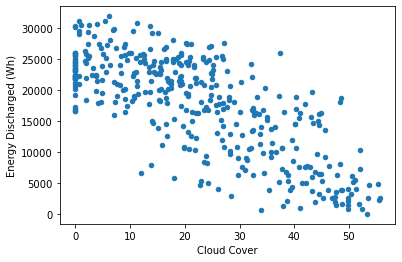

In [8]:
#Plot a basic scatter plot to observe the trend generally
solar.plot.scatter(x='Cloud Cover', y='Energy Discharged (Wh)')

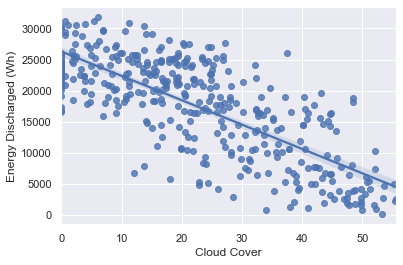

In [9]:
#Generate a regression line with a robust fit to exclude outliers
import seaborn as sns; sns.set_theme(color_codes=True)
solar = pd.read_csv(r'C:\Users\valha\Desktop\Solar Data\Weather_and_energy_Final_2020_2021.csv', header=0)
ax = sns.regplot(x='Cloud Cover', y='Energy Discharged (Wh)', data=solar, robust=True)

<AxesSubplot:xlabel='Cloud Cover', ylabel='Energy Discharged (Wh)'>

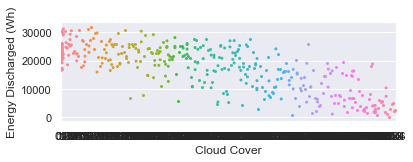

In [10]:
#Spreading out the data to better observe the trends
plt.subplot(2,1,1)
sns.stripplot(x='Cloud Cover', y='Energy Discharged (Wh)', data=solar, jitter=True, size=3)

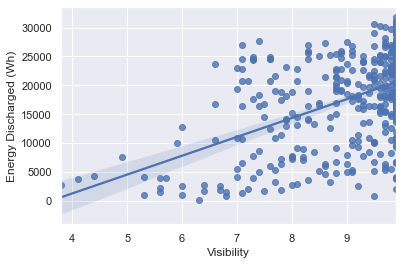

In [5]:
#Scatterplot for secondary variable
import seaborn as sns; sns.set_theme(color_codes=True)
solar = pd.read_csv(r'C:\Users\valha\Desktop\Solar Data\Weather_and_energy_Final_2020_2021.csv', header=0)
ax = sns.regplot(x='Visibility', y='Energy Discharged (Wh)', data=solar)

<b> With the data graphed we can see this can be modeled well with a linear regression. I will now created some predictive models </b>

In [19]:
#In this model the Energy Discharged is dependent on the Cloud Cover
import statsmodels.api as sm

X = solar['Cloud Cover']
y = solar['Energy Discharged (Wh)']

solar_model = sm.OLS(y, X).fit()
predictions = solar_model.predict(X) 

solar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Energy Discharged (Wh)   R-squared (uncentered):                   0.324
Model:                                OLS   Adj. R-squared (uncentered):              0.322
Method:                     Least Squares   F-statistic:                              187.9
Date:                    Thu, 08 Apr 2021   Prob (F-statistic):                    3.29e-35
Time:                            19:05:43   Log-Likelihood:                         -4358.0
No. Observations:                     393   AIC:                                      8718.
Df Residuals:                         392   BIC:                                      8722.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cloud Cover   405.1251     29.556     13.707      0.000     347.016     463.234
==============================================================================
Omnibus:                       51.639   Durbin-Watson:                   0.908
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.220
Skew:                          -0.486   Prob(JB):                     1.23e-06
Kurtosis:                       2.152   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<b> The first model is not a great fit. I will add a constant to the model. </b>

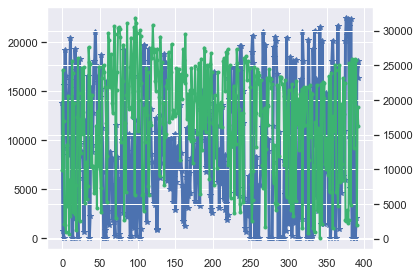

In [21]:
#Compare model to energy output
ax = solar_model.predict(X).plot(linewidth=3, marker='*')
ax2 = ax.twinx()
ax2.plot(solar['Energy Discharged (Wh)'], 'mediumseagreen', linewidth=2, marker='.')
plt.tight_layout()
plt.show()

In [12]:
#Second model with a constant
X = solar['Cloud Cover']
y = solar['Energy Discharged (Wh)']
X = sm.add_constant(X)

solar_model_2 = sm.OLS(y, X).fit()
predictions_2 = solar_model_2.predict(X) 

solar_model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     Energy Discharged (Wh)   R-squared:                       0.571
Model:                                OLS   Adj. R-squared:                  0.570
Method:                     Least Squares   F-statistic:                     520.3
Date:                    Thu, 08 Apr 2021   Prob (F-statistic):           7.72e-74
Time:                            19:02:44   Log-Likelihood:                -3920.2
No. Observations:                     393   AIC:                             7844.
Df Residuals:                         391   BIC:                             7852.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        2.615e+04    459.576     56.892      0.000    2.52e+04     2.7e+04
Cloud Cover  -387.3762     16.983    -22.809      0.000    -420.766    -353.986
==============================================================================
Omnibus:                        3.169   Durbin-Watson:                   1.565
Prob(Omnibus):                  0.205   Jarque-Bera (JB):                2.490
Skew:                          -0.054   Prob(JB):                        0.288
Kurtosis:                       2.625   Cond. No.                         47.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

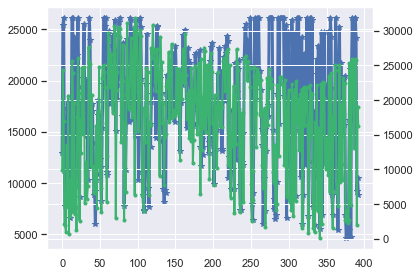

In [16]:
#Compare model to energy output
ax = solar_model_2.predict(X).plot(linewidth=3, marker='*')
ax2 = ax.twinx()
ax2.plot(solar['Energy Discharged (Wh)'], 'mediumseagreen', linewidth=2, marker='.')
plt.tight_layout()
plt.show()

<b> The R squared value has increased with the incorporation of a constant, but I will now include the second more correlated value for predicting Energy Discharged, Visibility. </b>

In [6]:
#Adding a second independent variable
import statsmodels.api as sm

X = solar[["Cloud Cover", "Visibility"]]
y = solar["Energy Discharged (Wh)"]


solar_model_3 = sm.OLS(y, X).fit()
predictions_3 = solar_model_3.predict(X) 

solar_model_3.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Energy Discharged (Wh)   R-squared (uncentered):                   0.919
Model:                                OLS   Adj. R-squared (uncentered):              0.919
Method:                     Least Squares   F-statistic:                              2221.
Date:                    Thu, 08 Apr 2021   Prob (F-statistic):                   3.29e-214
Time:                            18:57:00   Log-Likelihood:                         -3940.8
No. Observations:                     393   AIC:                                      7886.
Df Residuals:                         391   BIC:                                      7894.
Df Model:                               2                                                  
Covariance Type:                nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Cloud Cover  -263.1524     16.128    -16.316      0.000    -294.862    -231.443
Visibility   2581.7071     48.143     53.626      0.000    2487.055    2676.359
==============================================================================
Omnibus:                        1.205   Durbin-Watson:                   1.546
Prob(Omnibus):                  0.547   Jarque-Bera (JB):                1.218
Skew:                          -0.134   Prob(JB):                        0.544
Kurtosis:                       2.945   Cond. No.                         5.03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

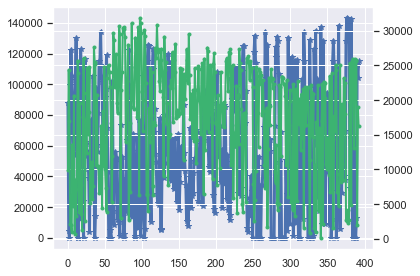

In [14]:
#Compare model to energy output
ax = solar_model_3.predict(X).plot(linewidth=3, marker='*')
ax2 = ax.twinx()
ax2.plot(solar['Energy Discharged (Wh)'], 'mediumseagreen', linewidth=2, marker='.')
plt.tight_layout()
plt.show()

<b> We now have a pretty good model with an R squared value of 0.919. I will continue to refine the model but I like the simplicity of this model with only two inputs. </b>

In [17]:
#Adding precipitation as an independent variable does not help the model
X = solar[["Cloud Cover", "Visibility", 'Precipitation']]
y = solar["Energy Discharged (Wh)"]

solar_model_4 = sm.OLS(y, X).fit()
predictions_4 = solar_model_4.predict(X) 

solar_model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Energy Discharged (Wh)   R-squared (uncentered):                   0.919
Model:                                OLS   Adj. R-squared (uncentered):              0.918
Method:                     Least Squares   F-statistic:                              1477.
Date:                    Thu, 08 Apr 2021   Prob (F-statistic):                   1.73e-212
Time:                            19:05:05   Log-Likelihood:                         -3940.8
No. Observations:                     393   AIC:                                      7888.
Df Residuals:                         390   BIC:                                      7900.
Df Model:                               3                                                  
Covariance Type:                nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Cloud Cover    -264.4776     18.302    -14.451      0.000    -300.461    -228.495
Visibility     2582.9369     48.862     52.862      0.000    2486.872    2679.002
Precipitation   112.9539    734.135      0.154      0.878   -1330.403    1556.311
==============================================================================
Omnibus:                        1.145   Durbin-Watson:                   1.547
Prob(Omnibus):                  0.564   Jarque-Bera (JB):                1.160
Skew:                          -0.130   Prob(JB):                        0.560
Kurtosis:                       2.945   Cond. No.                         74.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

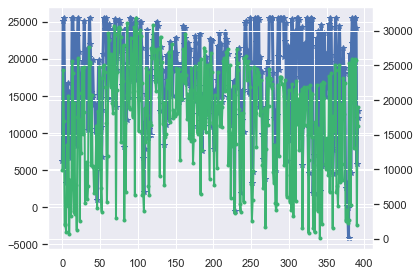

In [18]:
#Compare model to energy output
ax = solar_model_4.predict(X).plot(linewidth=3, marker='*')
ax2 = ax.twinx()
ax2.plot(solar['Energy Discharged (Wh)'], 'mediumseagreen', linewidth=2, marker='.')
plt.tight_layout()
plt.show()

In [22]:
#Including Temperature does increase the accuracy of the model
X = solar[["Cloud Cover", "Visibility", 'Precipitation', "Temperature"]]
y = solar["Energy Discharged (Wh)"]

solar_model_5 = sm.OLS(y, X).fit()
predictions_5 = solar_model_5.predict(X) 

solar_model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Energy Discharged (Wh)   R-squared (uncentered):                   0.935
Model:                                OLS   Adj. R-squared (uncentered):              0.935
Method:                     Least Squares   F-statistic:                              1410.
Date:                    Thu, 08 Apr 2021   Prob (F-statistic):                   5.59e-230
Time:                            19:06:57   Log-Likelihood:                         -3896.3
No. Observations:                     393   AIC:                                      7801.
Df Residuals:                         389   BIC:                                      7817.
Df Model:                               4                                                  
Covariance Type:                nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Cloud Cover    -296.1701     16.672    -17.764      0.000    -328.949    -263.391
Visibility     1671.2180    101.596     16.450      0.000    1471.473    1870.963
Precipitation -1480.6745    675.720     -2.191      0.029   -2809.195    -152.154
Temperature     167.8073     16.882      9.940      0.000     134.616     200.999
==============================================================================
Omnibus:                        3.085   Durbin-Watson:                   1.719
Prob(Omnibus):                  0.214   Jarque-Bera (JB):                2.702
Skew:                          -0.115   Prob(JB):                        0.259
Kurtosis:                       2.665   Cond. No.                         168.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

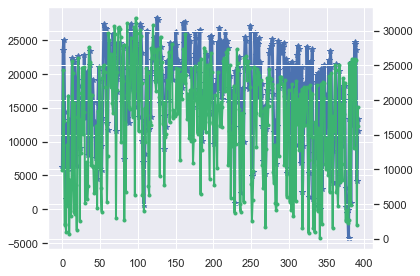

In [23]:
#Compare model to energy output
ax = solar_model_5.predict(X).plot(linewidth=3, marker='*')
ax2 = ax.twinx()
ax2.plot(solar['Energy Discharged (Wh)'], 'mediumseagreen', linewidth=2, marker='.')
plt.tight_layout()
plt.show()

In [24]:
#Adding additional variables gets a more accurate model
X = solar[["Cloud Cover", "Visibility", 'Precipitation', "Temperature", "Maximum Temperature"]]
y = solar["Energy Discharged (Wh)"]

solar_model_6 = sm.OLS(y, X).fit()
predictions_6 = solar_model_6.predict(X) 

solar_model_6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                  
===========================================================================================
Dep. Variable:     Energy Discharged (Wh)   R-squared (uncentered):                   0.939
Model:                                OLS   Adj. R-squared (uncentered):              0.938
Method:                     Least Squares   F-statistic:                              1189.
Date:                    Thu, 08 Apr 2021   Prob (F-statistic):                   9.75e-233
Time:                            19:07:32   Log-Likelihood:                         -3886.2
No. Observations:                     393   AIC:                                      7782.
Df Residuals:                         388   BIC:                                      7802.
Df Model:                               5                                                  
Covariance Type:                nonrobust                                                  
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Cloud Cover          -249.0663     19.293    -12.910      0.000    -286.998    -211.134
Visibility           1295.5374    129.114     10.034      0.000    1041.686    1549.389
Precipitation       -1636.5272    660.191     -2.479      0.014   -2934.526    -338.528
Temperature          -199.1386     82.470     -2.415      0.016    -361.282     -36.996
Maximum Temperature   347.8775     76.609      4.541      0.000     197.258     498.498
==============================================================================
Omnibus:                        3.912   Durbin-Watson:                   1.726
Prob(Omnibus):                  0.141   Jarque-Bera (JB):                2.869
Skew:                          -0.043   Prob(JB):                        0.238
Kurtosis:                       2.591   Cond. No.                         248.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

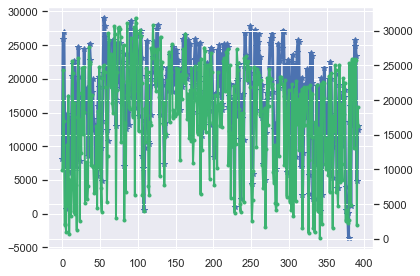

In [25]:
#Compare model to energy output
ax = solar_model_6.predict(X).plot(linewidth=3, marker='*')
ax2 = ax.twinx()
ax2.plot(solar['Energy Discharged (Wh)'], 'mediumseagreen', linewidth=2, marker='.')
plt.tight_layout()
plt.show()

<b> While adding more varibles to the model makes it more accurate, I believe the increased R squared values are not worth the burden of inputting additional weather variables. To make this process better for a user to input values or automation of the reporting through pipelining weather data, a simplier process may be more desireable and a 2-3% difference in predicted energy generation for the day is acceptable. Looking at the graphs, model 6 is the best fit although model 2 has nice prediction for its simplicity. </b>

<b> I have explored my data. I will move on to visualizations and come back to data for the macro analysis of trends by state and implications for improving residential solar 